In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("training_transform.csv")


In [3]:
df

,row_id,video_id,x,y,angle,boat_id
0,0,00WK7DR6FyPZ5u3A,715.400000,469.700000,50.583182,0
1,1,01wO3HNwawJYADQw,764.461538,431.653846,1.831179,1
2,2,02p3Yn87z0b5grhL,685.312500,434.062500,54.124690,0
3,3,05RagNzyjVdXeUFR,713.906250,473.000000,54.411224,0
4,4,06aFbpjpYHVBLJZa,1215.021739,320.326087,-89.586198,2
5,5,09GA0YdSz0NvJUJx,759.277778,422.402778,2.691839,1
6,6,0D5zA3WRD5pXjr8j,762.302817,428.126761,1.643031,1
7,7,0EmM5wsVVNqaKNaM,358.394737,623.210526,1.927207,3
8,8,0L5wBDT4CEazgAw6,211.166667,682.200000,7.008572,4
9,9,0QAlqRiUad7xcB9k,755.649123,406.833333,3.297101,1


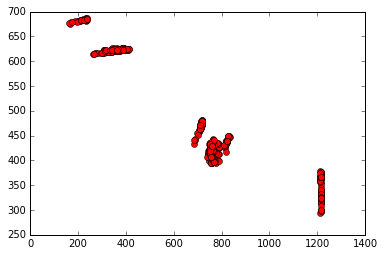

In [4]:
plt.plot(df['x'], df['y'], 'ro')

In [5]:
from sklearn.cluster import DBSCAN


In [6]:
X = np.dstack((
            df['x'].values, 
            df['y'].values,
            np.fmod(df['angle'].values + 15.,90.)/10. # do this so -89 and +89 fall close (see notebook)
            )).squeeze()


In [7]:
X.shape


(1332, 3)

In [8]:
X

array([[ 715.4       ,  469.7       ,    6.55831821],
       [ 764.46153846,  431.65384615,    1.68311794],
       [ 685.3125    ,  434.0625    ,    6.91246903],
       ..., 
       [ 342.4025974 ,  622.19480519,    1.58011317],
       [ 362.71428571,  621.78571429,    1.6392752 ],
       [ 760.93589744,  429.34615385,    1.63810703]])

In [9]:
angles = X[:,2]

In [10]:
clustering = DBSCAN(min_samples=0, eps=20.).fit(X)

In [11]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

X[labels == -1]
n_clusters

5

In [12]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
print(unique_labels, colors)
X[labels==5]


(set([0, 1, 2, 3, 4]), [(0.61960786581039429, 0.0039215688593685627, 0.25882354378700256, 1.0), (0.97485582618152389, 0.55740101138750708, 0.32272204055505638, 1.0), (0.99807766255210428, 0.99923106502084169, 0.74602077638401709, 1.0), (0.52733565253369952, 0.81061131463331337, 0.64521340061636534, 1.0), (0.36862745881080627, 0.30980393290519714, 0.63529413938522339, 1.0)])


array([], shape=(0, 3), dtype=float64)

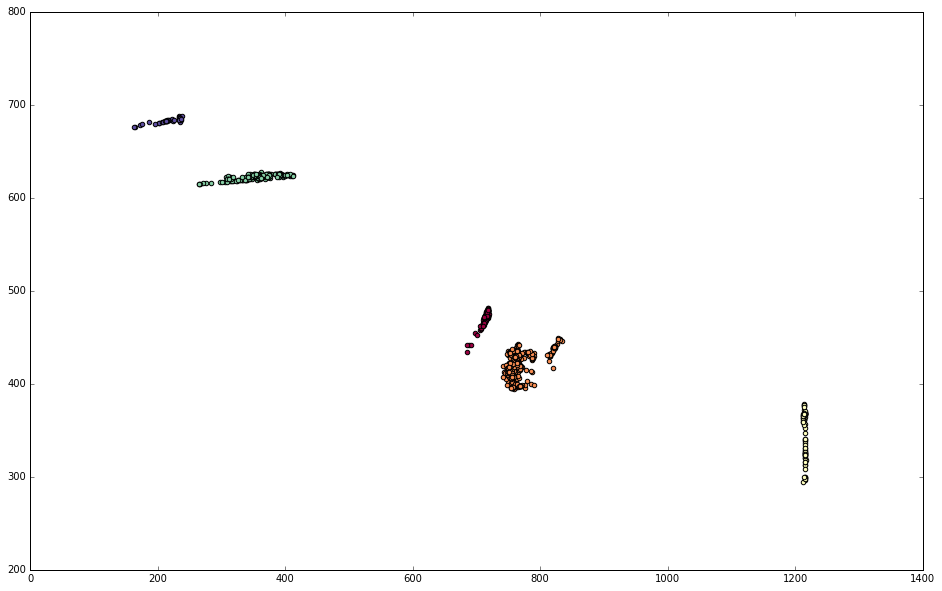

In [13]:
plt.figure(figsize=(16,10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:,0],xy[:,1], c=tuple(col))
plt.show()


In [14]:
labels

array([0, 1, 0, ..., 3, 3, 1])

In [15]:
df['cluster'] = labels

In [16]:
df

,row_id,video_id,x,y,angle,boat_id,cluster
0,0,00WK7DR6FyPZ5u3A,715.400000,469.700000,50.583182,0,0
1,1,01wO3HNwawJYADQw,764.461538,431.653846,1.831179,1,1
2,2,02p3Yn87z0b5grhL,685.312500,434.062500,54.124690,0,0
3,3,05RagNzyjVdXeUFR,713.906250,473.000000,54.411224,0,0
4,4,06aFbpjpYHVBLJZa,1215.021739,320.326087,-89.586198,2,2
5,5,09GA0YdSz0NvJUJx,759.277778,422.402778,2.691839,1,1
6,6,0D5zA3WRD5pXjr8j,762.302817,428.126761,1.643031,1,1
7,7,0EmM5wsVVNqaKNaM,358.394737,623.210526,1.927207,3,3
8,8,0L5wBDT4CEazgAw6,211.166667,682.200000,7.008572,4,4
9,9,0QAlqRiUad7xcB9k,755.649123,406.833333,3.297101,1,1


In [17]:
angles = df['angle'].values

In [18]:
np.fmod(angles + 15, 90)

array([ 65.58318211,  16.83117936,  69.12469027, ...,  15.80113173,
        16.39275197,  16.38107033])

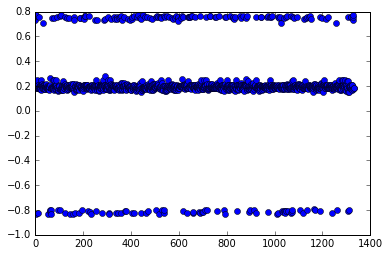

In [19]:
plt.plot(np.fmod(angles + 15, 90.)/90, 'o')

In [20]:
angles

array([ 50.58318211,   1.83117936,  54.12469027, ...,   0.80113173,
         1.39275197,   1.38107033])

In [43]:
boat_angles_frame = pd.DataFrame(columns=['video_id', 'boat_id', 'angle', 'x', 'y']).set_index('video_id')


In [44]:
for video_id,row_df in df.groupby('video_id'):
    boat_id = int(row_df['boat_id'].values)
    boat_angles_frame.loc[video_id]=[
        boat_id, 
        (np.mod(angles[labels==boat_id] +90. + 15, 180)-90).mean()-15,
        df[labels==boat_id]['x'].values.mean(),
        df[labels==boat_id]['y'].values.mean(),
        
    ]


In [45]:
boat_angles_frame

,boat_id,angle,x,y
video_id,,,,
00WK7DR6FyPZ5u3A,0.0,52.779586,713.635763,471.310153
01wO3HNwawJYADQw,1.0,2.572848,762.687572,420.351991
02p3Yn87z0b5grhL,0.0,52.779586,713.635763,471.310153
05RagNzyjVdXeUFR,0.0,52.779586,713.635763,471.310153
06aFbpjpYHVBLJZa,2.0,-88.479756,1214.324555,345.819558
09GA0YdSz0NvJUJx,1.0,2.572848,762.687572,420.351991
0D5zA3WRD5pXjr8j,1.0,2.572848,762.687572,420.351991
0EmM5wsVVNqaKNaM,3.0,1.830423,353.241407,622.528508
0L5wBDT4CEazgAw6,4.0,7.230037,214.461204,682.701099


In [50]:
df=df.set_index('video_id')

In [59]:
np.max(np.absolute(df['x']-boat_angles_frame['x']))


88.658073196330633

In [58]:
np.max(np.absolute(df['y']-boat_angles_frame['y']))

51.819557705084378